<a href="https://colab.research.google.com/github/vaibhav948/Machine-learning-models/blob/main/FashionMNIST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

### getting the datasets

In [ ]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 338kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.30MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.9MB/s]


In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_toidx = train_data.class_to_idx
class_toidx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### visualizing data

image shape : torch.Size([1, 28, 28])


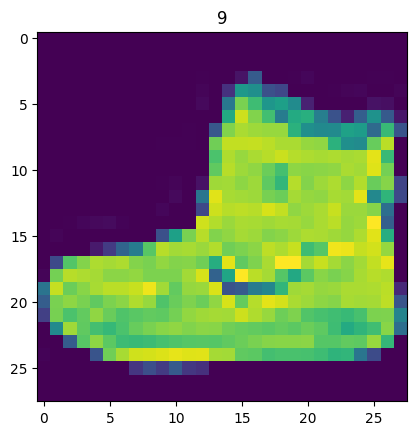

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
plt.show()

Text(0.5, 1.0, 'Ankle boot')

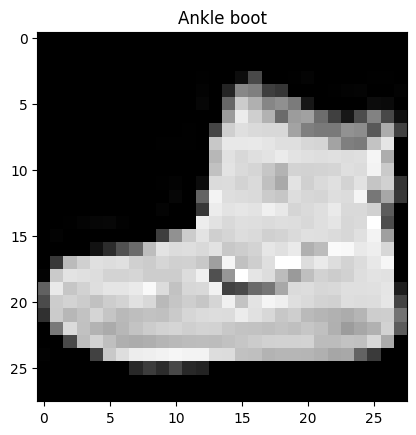

In [ ]:
plt.imshow(image.squeeze() , cmap="gray")
plt.title(class_names[label])

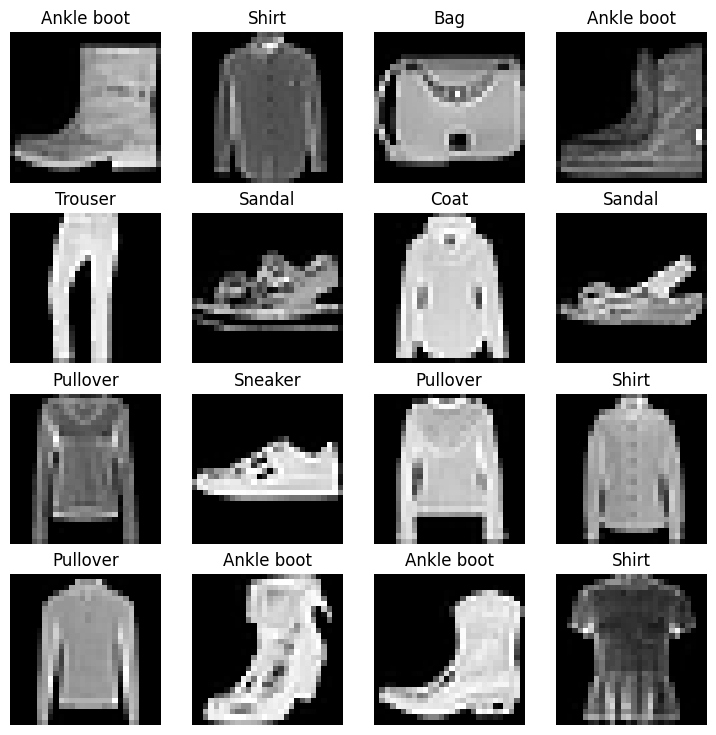

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9 , 9))
row , col = 4 , 4
for i in range(1 , row * col + 1):
  random_idx = torch.randint(0 , len(train_data) , size=[1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(row , col , i)
  plt.imshow(img.squeeze() , cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

In [ ]:
train_features_batch , train_label_batch = next(iter(train_dataloader))
train_features_batch.shape , train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

img size :torch.Size([1, 28, 28])
label : 6 , label_size : torch.Size([])


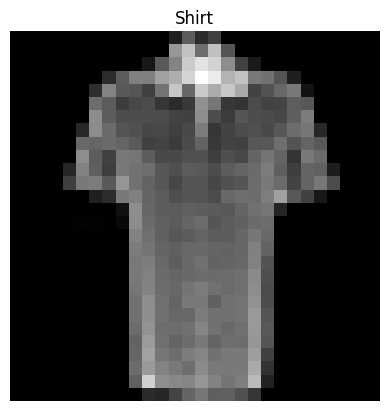

In [ ]:
# show sample
torch.manual_seed(42)
random_idx = torch.randint(0 , len(train_features_batch) , size = [1]).item()
img , label = train_features_batch[random_idx] , train_label_batch[random_idx]
plt.imshow(img.squeeze() , cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"img size :{img.shape}")
print(f"label : {label} , label_size : {label.shape}")

In [ ]:
flatten_model = nn.Flatten()
x = train_features_batch[0]

output = flatten_model(x)
print(f"shape of train_features_batch : {train_features_batch.shape}")
print(f"shape of output after flattening: { output.shape}") ## it reduces the dimension by multiplying the the height and weight

shape of train_features_batch : torch.Size([32, 1, 28, 28])
shape of output after flattening: torch.Size([1, 784])


### starting gpu "cuda"

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### building CNN model

In [ ]:
torch.manual_seed(42)

class FMNISTCNNModelV0(nn.Module):
  def __init__(self , input_shape , hidden_units , output_shapes):
    super().__init__()
    self.CNN_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.CNN_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units ,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7 * 7,
                  out_features=output_shapes)
    )

  def forward(self, x):
    x = self.CNN_block1(x)
    # print(x.shape)
    x = self.CNN_block2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x ;

In [ ]:
torch.manual_seed(42)
modelCNN = FMNISTCNNModelV0(input_shape=1, ### it is the no. of color channels in are image
                            hidden_units=10,
                            output_shapes=len(class_names)).to(device)

In [ ]:
torch.manual_seed(42)
images = torch.randn(size=(32 , 2 , 64 , 64))
test_image = images[0]

print("shape of images" , images.shape)
print("single image shape" , test_image.shape)
print("test image\n" , test_image)

shape of images torch.Size([32, 2, 64, 64])
single image shape torch.Size([2, 64, 64])
test image
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]]])


### accuracy function

In [ ]:
def accuracy_fn(y_pred , y_true):

  correct = (y_pred == y_true).sum().item()
  total = y_true.size(0)
  accuracy = correct / total * 100

  return accuracy

## loss and optimizer

In [ ]:
# from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= modelCNN.parameters() , lr = 0.1)

### building the training and testing loop

In [ ]:
def train_step(model : torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device
               ):

  train_loss , train_acc = 0 , 0
  for batch ,(X , y) in enumerate(data_loader):
    X , y = X.to(device) , y.to(device)
    model.train()

    y_pred = model(X)

    loss = loss_fn(y_pred , y)
    train_loss += loss
    train_acc += accuracy_fn(y , y_pred.argmax(dim = 1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"looked at {batch *len(X)} / {len(train_dataloader.dataset)} samples")

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"train_loss :{train_loss} | train_acc :{train_acc:.2f}%")

In [ ]:
def test_step(model : torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device
               ):
  model.eval()
  test_loss = 0
  test_acc = 0
  with torch.inference_mode():
    for X_test , y_test in data_loader :
      X_test , y_test = X_test.to(device) , y_test.to(device)
      test_pred = model(X_test)

      test_loss += loss_fn(test_pred , y_test)

      test_acc += accuracy_fn(y_true = y_test , y_pred = test_pred.argmax(dim = 1))


    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"test_loss: {test_loss:.5f} | test_acc: {test_acc:.2f}%")

### training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_modelCNN = timer()

epochs = 3 ;
for epoch in tqdm(range(epochs)):
  print(f"epoch : {epoch} \n -------")
  train_step(model= modelCNN,
             data_loader=train_dataloader,
             loss=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=modelCNN,
            data_loader=test_dataloader,
            loss=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_modelCNN = timer()
total_train_time_modelCNN = train_time_end_modelCNN - train_time_start_modelCNN

  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 0 
 -------
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
train_loss :0.5951793193817139 | train_acc :78.38%
test_loss: 0.39500 | test_acc: 85.99%
epoch : 1 
 -------
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
train_loss :0.3653560280799866 | train_acc :86.90%
test_loss: 0.35244 | test_acc: 86.91%
epoch : 2 
 -------
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
train_loss :0.3258754312992096 | train_acc :88.13%
test_loss: 0.32719 | test_acc: 88.07%


### make predictions using our model

In [ ]:
def make_pred(model:torch.nn.Module,
              data:list,
              device:torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample , dim = 1).to(device)

      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze() , dim = 0)
      pred_probs.append(pred_prob.cpu())

  ## stack the pred rpobs to turn it into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data) , k = 9):
  test_samples.append(sample)
  test_labels.append(label)

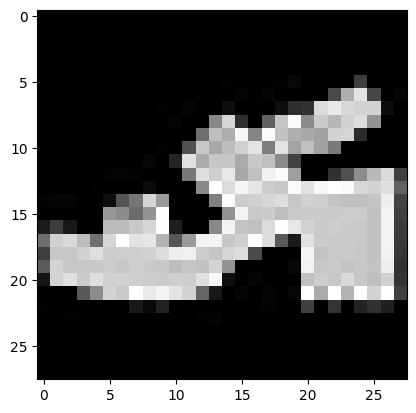

In [ ]:
plt.imshow(test_samples[0].squeeze() , cmap="gray")

In [ ]:
pred_probs = make_pred(model=modelCNN,
                       data= test_samples)

pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

In [ ]:
pred_class = pred_probs.argmax(dim =1)
pred_class

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

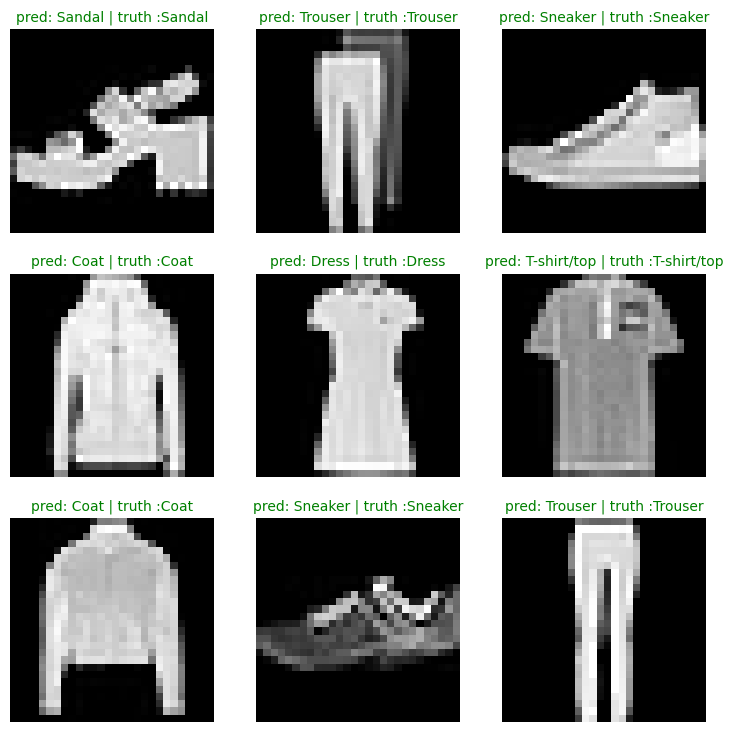

In [ ]:
#plot predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
nrow = 3
ncol = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrow , ncol , i + 1)
  plt.imshow(sample.squeeze() , cmap = "gray")

  pred_label = class_names[pred_class[i]]
  truth_label = class_names[test_labels[i]]

  title_text= f"pred: {pred_label} | truth :{truth_label}"
  if pred_label == truth_label:
    plt.title(title_text , fontsize=10 , c = 'g')
  else:
    plt.title(title_text , fontsize=10 , c='r')
  plt.axis(False)

### plot the confusion matrix

In [ ]:
from tqdm.auto import tqdm

modelCNN.eval()

y_preds = []
with torch.inference_mode():
  for X , y in tqdm(test_dataloader , desc = "MAking predictions----"):
    X , y = X.to(device) , y.to(device)

    y_logits = modelCNN(X)
    y_pred = torch.softmax(y_logits.squeeze() , dim = 0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

MAking predictions----:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [ ]:
!pip install torchmetrics -U mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 42.1 MB/s eta 0:00:00


In [ ]:
import torchmetrics , mlxtend

In [ ]:
mlxtend.__version__

'0.23.4'

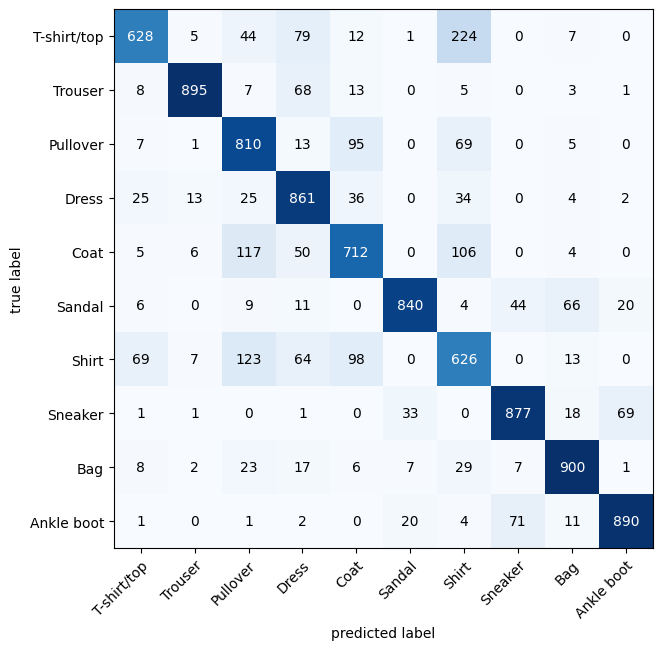

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass" ,num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target=test_data.targets)

fig , ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10 ,7)
)